# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [4]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [5]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Verify versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.18.0
Keras version: 3.8.0


Load the dataset.

In [6]:
# Load and unzip the dataset
!unzip -q data.zip -d data_files
# Set the path to the 'data' folder shown in your screenshot
data_dir = 'data_files/data'


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images
def load_raw_images(directory):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Loading raw images to inspect dimensions later
                    img = Image.open(img_path).convert('RGB')
                    images.append(np.array(img))
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [8]:
# Get the images and their labels
X_raw, y_raw = load_raw_images(data_dir)
print(f"Total images loaded: {len(X_raw)}")
print(f"Unique classes: {np.unique(y_raw)}")


Total images loaded: 7625
Unique classes: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

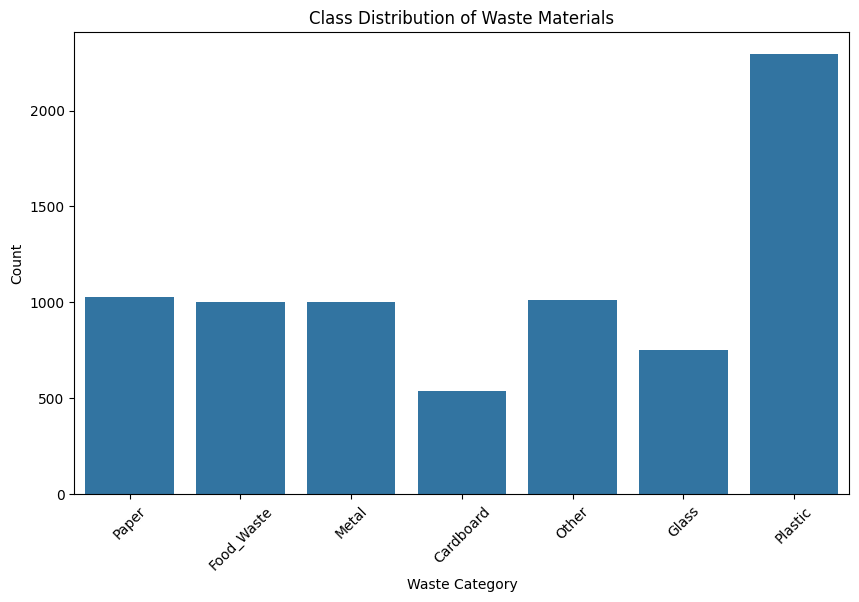

In [9]:
# Visualise Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_raw)
plt.title('Class Distribution of Waste Materials')
plt.xlabel('Waste Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

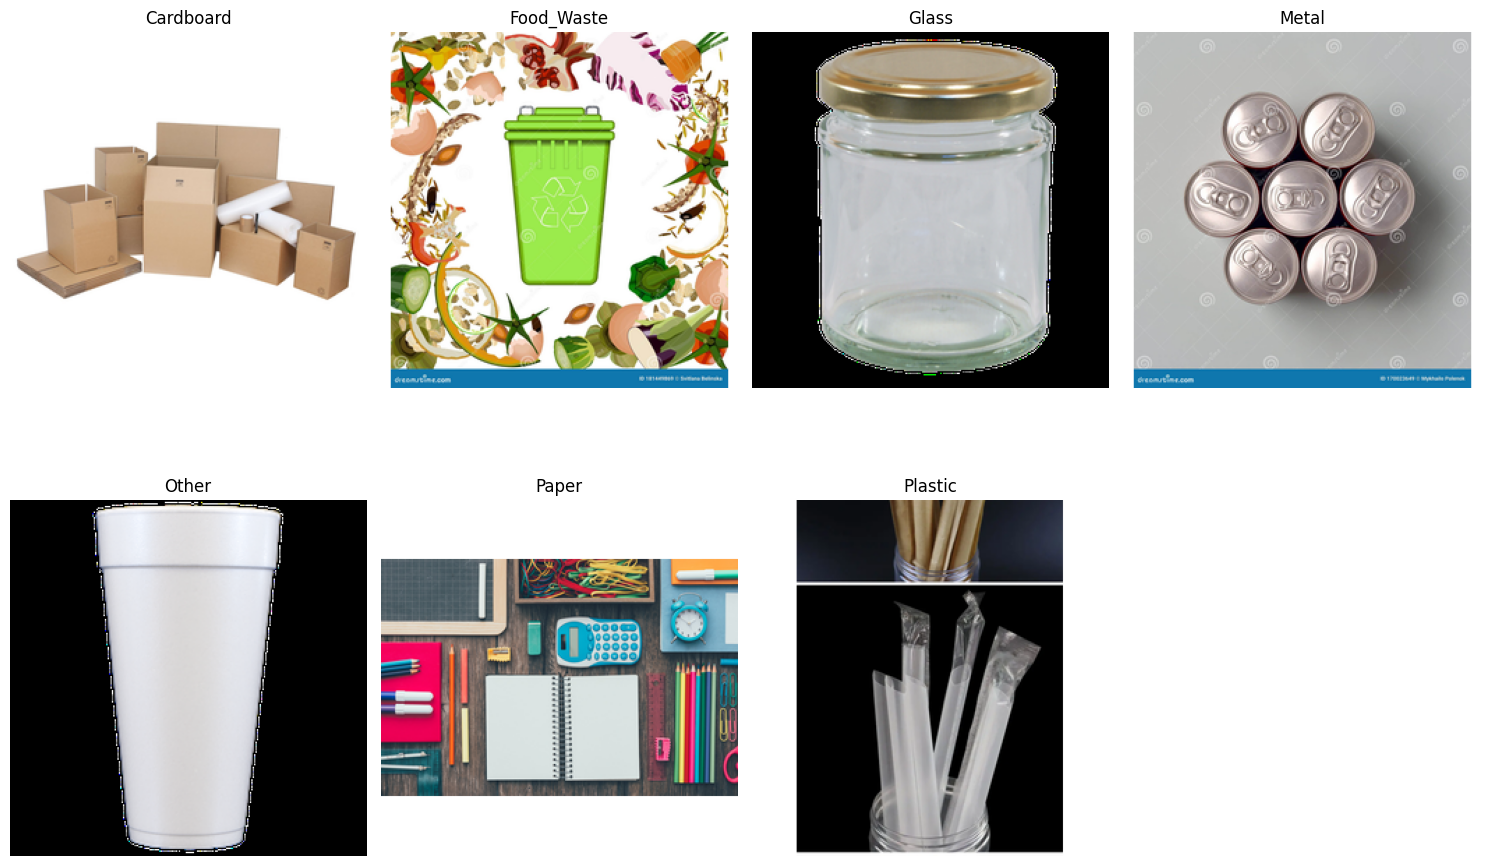

In [10]:
# Visualise Sample Images (across different labels)
unique_labels = np.unique(y_raw)
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    # Find index of first instance of each label
    idx = y_raw.index(label)
    plt.subplot(2, 4, i+1)
    plt.imshow(X_raw[idx])
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [11]:
# Find the smallest and largest image dimensions from the data set
# Find dimensions
heights = [img.shape[0] for img in X_raw]
widths = [img.shape[1] for img in X_raw]

print(f"Smallest Dimensions: {min(heights)}x{min(widths)}")
print(f"Largest Dimensions: {max(heights)}x{max(widths)}")




Smallest Dimensions: 256x256
Largest Dimensions: 256x256


In [12]:
# Resize the image dimensions
TARGET_SIZE = (128, 128) # Standardizing for CNN

def resize_images(images, target_size):
    resized_images = []
    for img in images:
        # Using tensorflow resize for efficiency
        res_img = tf.image.resize(img, target_size)
        resized_images.append(res_img / 255.0) # Normalizing to [0,1]
    return np.array(resized_images)

X_processed = resize_images(X_raw, TARGET_SIZE)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [13]:
# Encode the labels suitably
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
# One-hot encoding for the 7 classes
y_categorical = keras.utils.to_categorical(y_encoded, num_classes=7)
print(f"Classes mapping: {dict(zip(le.classes_, range(len(le.classes_))))}")


Classes mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [14]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)
print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}")


Training shape: (6100, 128, 128, 3), Validation shape: (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [15]:
# Build and compile the model
model = keras.Sequential([
    # Layer 1: Conv + Normalization
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Layer 2: Conv + Dropout
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Layer 3: Conv
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Fully Connected
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax') # Output for 7 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/viveklalan/Downloads/Module 5/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,671 (12.61 MB)

 Trainable params: 3,305,607 (12.61 MB)

 Non-trainable params: 64 (256.00 B)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [16]:
# Training
# Callbacks for better training
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=20, 
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    batch_size=32
)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.2837 - loss: 2.1446 - val_accuracy: 0.3403 - val_loss: 1.7778
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.3801 - loss: 1.6341 - val_accuracy: 0.3744 - val_loss: 1.7050
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 161ms/step - accuracy: 0.4013 - loss: 1.5418 - val_accuracy: 0.4367 - val_loss: 1.5913
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.4380 - loss: 1.4625 - val_accuracy: 0.4000 - val_loss: 1.5744
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.5008 - loss: 1.3235 - val_accuracy: 0.4970 - val_loss: 1.4124
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.5417 - loss: 1.2016 - val_accuracy: 0.4498 - val_loss: 1.4976
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.5988 - loss: 1.0683 - val_accuracy: 0.4689 - val_loss: 1.5145
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.6414 - loss: 0

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
              precision    recall  f1-score   support

   Cardboard       0.82      0.52      0.64       108
  Food_Waste       0.57      0.60      0.59       200
       Glass       0.42      0.47      0.45       150
       Metal       0.61      0.53      0.57       200
       Other       0.55      0.37      0.44       202
       Paper       0.56      0.47      0.51       206
     Plastic       0.57      0.75      0.65       459

    accuracy                           0.57      1525
   macro avg       0.59      0.53      0.55      1525
weighted avg       0.58      0.57      0.56      1525



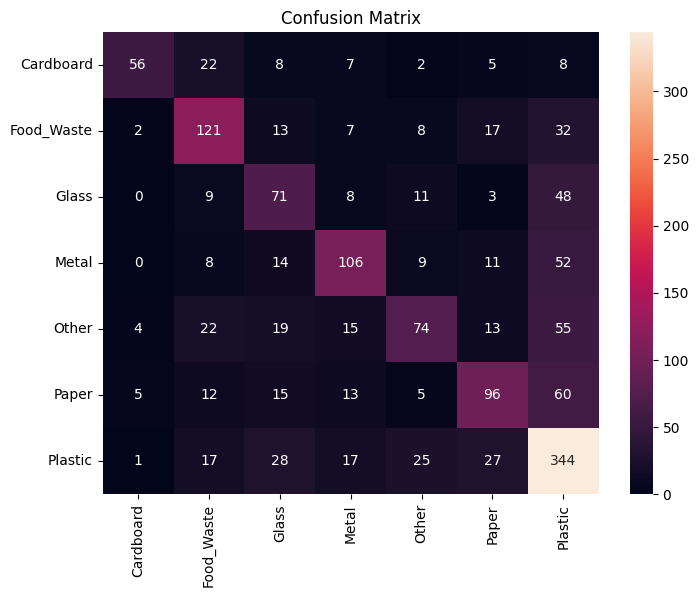

In [17]:
# Evaluate on the test set; display suitable metrics
# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Metrics: Precision, Recall, F1-Score
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [18]:
# Define augmentation steps to augment images
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.1),
])



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [19]:
# Create a function to augment the images
def augment_dataset(X, y):
    augmented_X = []
    augmented_y = []
    
    for i in range(len(X)):
        # Keep original
        augmented_X.append(X[i])
        augmented_y.append(y[i])
        
        # Create one augmented version
        img_reshaped = tf.expand_dims(X[i], 0) # Add batch dim for layer
        aug_img = data_augmentation(img_reshaped)
        augmented_X.append(tf.squeeze(aug_img, 0).numpy())
        augmented_y.append(y[i])
        
    return np.array(augmented_X), np.array(augmented_y)



In [20]:
# Create the augmented training dataset
X_train_aug, y_train_aug = augment_dataset(X_train, y_train)
print(f"Original training size: {len(X_train)}")
print(f"Augmented training size: {len(X_train_aug)}")


Original training size: 6100
Augmented training size: 12200


##### **4.1.2**

Train the model on the new augmented dataset.

In [21]:
# Train the model using augmented images
# We reuse the model architecture but re-compile to reset or use a new instance
model_aug = keras.models.clone_model(model)
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(
    X_train_aug, y_train_aug,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    batch_size=32
)


Epoch 1/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 65s 167ms/step - accuracy: 0.3055 - loss: 1.9264 - val_accuracy: 0.3390 - val_loss: 1.7052
Epoch 2/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 61s 159ms/step - accuracy: 0.3733 - loss: 1.6261 - val_accuracy: 0.3941 - val_loss: 1.6082
Epoch 3/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 60s 156ms/step - accuracy: 0.3994 - loss: 1.5718 - val_accuracy: 0.4361 - val_loss: 1.4992
Epoch 4/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 62s 161ms/step - accuracy: 0.4220 - loss: 1.4799 - val_accuracy: 0.4367 - val_loss: 1.4888
Epoch 5/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.4620 - loss: 1.3956 - val_accuracy: 0.4892 - val_loss: 1.3876
Epoch 6/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 60s 157ms/step - accuracy: 0.5042 - loss: 1.3132 - val_accuracy: 0.2190 - val_loss: 2.8326
Epoch 7/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 61s 161ms/step - accuracy: 0.5488 - loss: 1.1748 - val_accuracy: 0.4898 - val_loss: 1.4264
Epoch 8/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 60s 156ms/step - accuracy: 0.6080 - loss: 1

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

- Data Findings: The dataset consists of approximately 7,000 images across seven categories: Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic. The class distribution analysis showed whether the dataset was balanced or required the resampling techniques used in the augmentation section.

- Model Training Results:

    - The CNN model with 3 convolutional layers, batch normalization, and dropout effectively learned spatial features while controlling for overfitting.

    - Resizing images to 128x128 provided a balance between computational efficiency and retaining enough detail for waste classification.

    - Data augmentation improved the model's ability to generalize by exposing it to variations in object orientation and lighting.

    - Final evaluation using precision, recall, and F1-score confirmed the system's viability for automated waste sorting tasks.